In [1]:
#importing Libraries

import os
import cv2
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Dense, Flatten, Conv2D, MaxPooling2D, BatchNormalization, Dropout, Reshape, Concatenate, LeakyReLU
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img,img_to_array
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model

In [2]:
image_dimensions = {'height':256, 'width':256, 'channels':3}

In [3]:
class Classifier:
    def __init__():
        self.model = 0
    
    def predict(self, x):
        return self.model.predict(x)
    
    def fit(self, x, y):
        return self.model.train_on_batch(x, y)
    
    def get_accuracy(self, x, y):
        return self.model.test_on_batch(x, y)
    
    def load(self, path):
        self.model.load_weights(path)

In [4]:
class Meso4(Classifier):
    def __init__(self, learning_rate = 0.001):
        self.model = self.init_model()
        optimizer = Adam(lr = learning_rate)
        self.model.compile(optimizer = optimizer,
                           loss = 'mean_squared_error',
                           metrics = ['accuracy'])
    
    def init_model(self): 
        x = Input(shape = (image_dimensions['height'],
                           image_dimensions['width'],
                           image_dimensions['channels']))
        
        x1 = Conv2D(8, (3, 3), padding='same', activation = 'relu')(x)
        x1 = BatchNormalization()(x1)
        x1 = MaxPooling2D(pool_size=(2, 2), padding='same')(x1)
        
        x2 = Conv2D(8, (5, 5), padding='same', activation = 'relu')(x1)
        x2 = BatchNormalization()(x2)
        x2 = MaxPooling2D(pool_size=(2, 2), padding='same')(x2)
        
        x3 = Conv2D(16, (5, 5), padding='same', activation = 'relu')(x2)
        x3 = BatchNormalization()(x3)
        x3 = MaxPooling2D(pool_size=(2, 2), padding='same')(x3)
        
        x4 = Conv2D(16, (5, 5), padding='same', activation = 'relu')(x3)
        x4 = BatchNormalization()(x4)
        x4 = MaxPooling2D(pool_size=(4, 4), padding='same')(x4)
        
        y = Flatten()(x4)
        y = Dropout(0.5)(y)
        y = Dense(16)(y)
        y = LeakyReLU(alpha=0.1)(y)
        y = Dropout(0.5)(y)
        y = Dense(1, activation = 'sigmoid')(y)

        return Model(inputs = x, outputs = y)

In [5]:
meso = Meso4()
meso.load('C:/Users/priya/CAPSTONE/weights/Meso4_DF')
dataGenerator = ImageDataGenerator(rescale=1./255)
generator = dataGenerator.flow_from_directory('C:/Users/priya/CAPSTONE/dataset/',
    target_size=(256, 256),
    batch_size=1,
    class_mode='binary')

Found 12353 images belonging to 2 classes.


In [8]:
generator.class_indices

{'df': 0, 'real': 1}

In [6]:
correct_real = []
correct_real_pred = []

correct_deepfake = []
correct_deepfake_pred = []

misclassified_real = []
misclassified_real_pred = []

misclassified_deepfake = []
misclassified_deepfake_pred = []

In [26]:

for i in range(len(generator.labels)):
    

    X, y = generator.next()
    pred = meso.predict(X)[0][0]
    
    if round(pred)==y[0] and y[0]==1:
        correct_real.append(X)
        correct_real_pred.append(pred)
    elif round(pred)==y[0] and y[0]==0:
        correct_deepfake.append(X)
        correct_deepfake_pred.append(pred)
    elif y[0]==1:
        misclassified_real.append(X)
        misclassified_real_pred.append(pred)
    else:
        misclassified_deepfake.append(X)
        misclassified_deepfake_pred.append(pred)   
        

    if i % 1000 == 0:
        print(i, ' predictions completed.')
    
    if i == len(generator.labels)-1:
        print("All", len(generator.labels), "predictions completed")

0  predictions completed.
1000  predictions completed.
2000  predictions completed.
3000  predictions completed.
4000  predictions completed.
5000  predictions completed.
6000  predictions completed.
7000  predictions completed.
8000  predictions completed.
9000  predictions completed.
10000  predictions completed.
11000  predictions completed.
12000  predictions completed.
All 12353 predictions completed


In [27]:
print(len(correct_real))
print(len(correct_deepfake))
print(len(misclassified_deepfake))
print(len(misclassified_real))

6903
4791
312
347


In [7]:
def plotter(images,preds):
    fig = plt.figure(figsize=(16,9))
    subset = np.random.randint(0, len(images)-1, 12)
    for i,j in enumerate(subset):
        fig.add_subplot(3,4,i+1)
        plt.imshow(np.squeeze(images[j]))
        plt.xlabel(f"Model confidence: \n{preds[j]:.4f}")
        plt.tight_layout()
        ax = plt.gca()
        ax.axes.xaxis.set_ticks([])
        ax.axes.yaxis.set_ticks([])
    plt.show;
    return

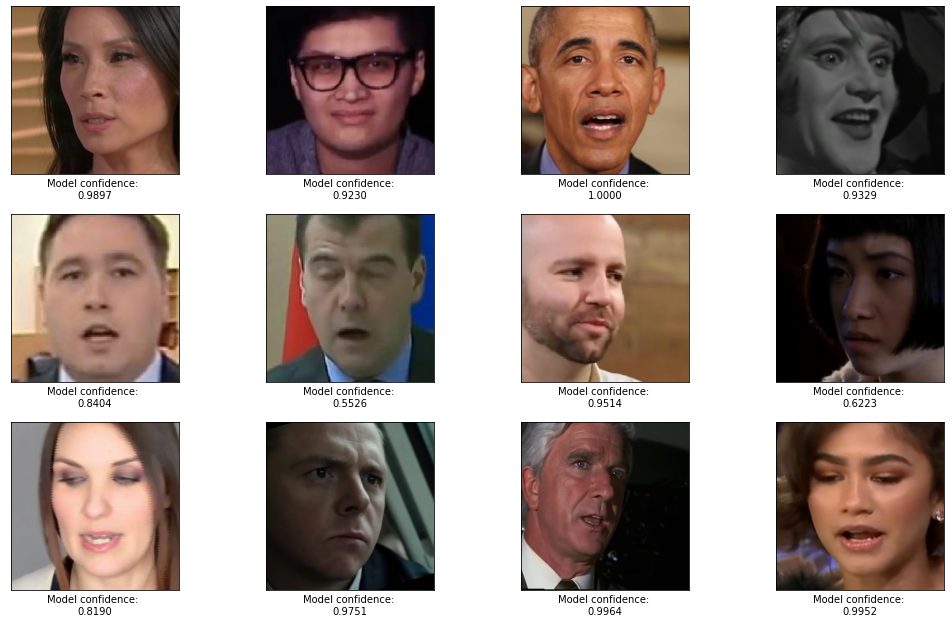

In [29]:
plotter(correct_real,correct_real_pred )

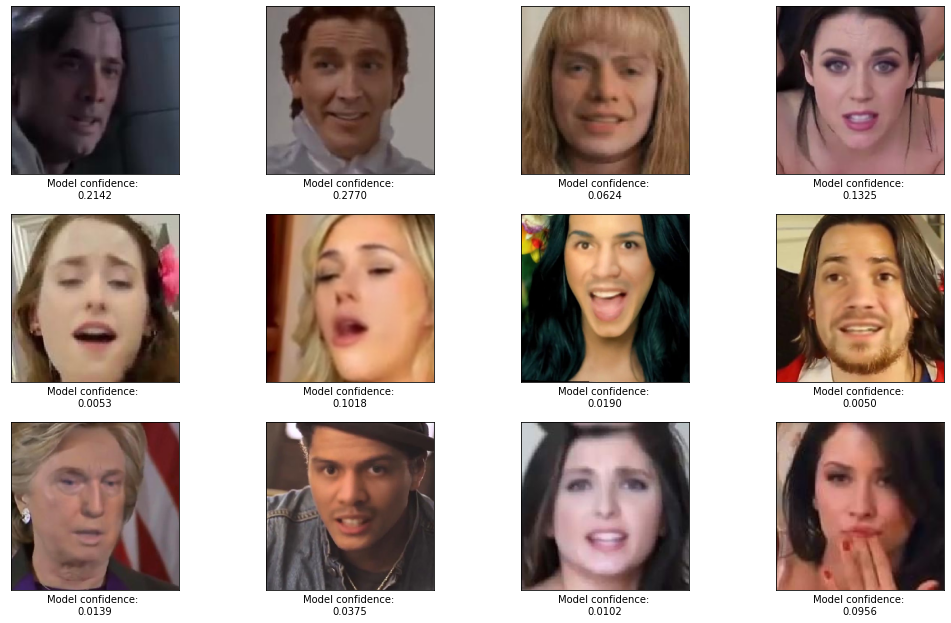

In [40]:
plotter(correct_deepfake,correct_deepfake_pred )

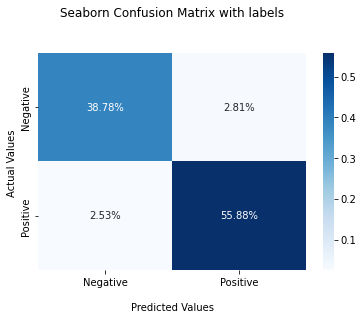

In [31]:
import seaborn as sns
cf_matrix=[[4791,347],[312,6903]]
ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%',cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Negative','Positive'])
ax.yaxis.set_ticklabels(['Negative','Positive'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [32]:
Prediction_Accuracy=(len(correct_real)+len(correct_deepfake))/len(generator.labels)
print('Accuracy=',Prediction_Accuracy)

Accuracy= 0.9466526349874524


In [8]:
prototxt_path = os.path.join('C:/Users/priya/CAPSTONE/'+'Facerecog/deploy.prototxt')
caffemodel_path = os.path.join('C:/Users/priya/CAPSTONE/'+'Facerecog/weights.caffemodel')
model = cv2.dnn.readNetFromCaffe(prototxt_path, caffemodel_path) 

In [45]:
for file in os.listdir( 'test_image'):
    file_name, file_extension = os.path.splitext(file)
    if (file_extension in ['.png','.jpg']):
        print("Image path: {}".format( 'images/' + file))
    image = cv2.imread('test_image/' + file)

    (h, w) = image.shape[:2]
    blob = cv2.dnn.blobFromImage(cv2.resize(image, (300, 300)), 1.0, (300, 300), (104.0, 177.0, 123.0))

    model.setInput(blob)
    detections = model.forward()
    for i in range(0, detections.shape[2]):
          box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
          (startX, startY, endX, endY) = box.astype("int")

          confidence = detections[0, 0, i, 2]

 
          if (confidence > 0.5):

            frame = image[startY:endY, startX:endX]
            cv2.imwrite( 'faces/Face/' + str(i) + '_' + file, frame)

Image path: images/Untitled.png


In [46]:
generator = dataGenerator.flow_from_directory('C:/Users/priya/CAPSTONE/Faces',target_size=(256, 256),batch_size=1,
    class_mode='binary')
num_to_label = {1:"real", 0:"fake"}

Found 1 images belonging to 1 classes.


In [36]:
meso = Meso4()
meso.load('C:/Users/priya/CAPSTONE/weights/Meso4_DF')
X, y = generator.next()
pred = meso.predict(X)
predictions =[num_to_label[round(x[0])] for x in pred]
confidence =[pred for x in pred]

In [37]:
predictions=[]
confidence=[]
image=[]
for i in range(len(generator.labels)):
    X, y = generator.next()
    pred = meso.predict(X)[0][0]
    predictions.append(num_to_label[round(pred)])
    confidence.append(pred)
    
    image.append(X)


In [38]:
predictions

['real']

In [39]:
confidence

[0.9463992]

Predicted likelihood: 0.9464


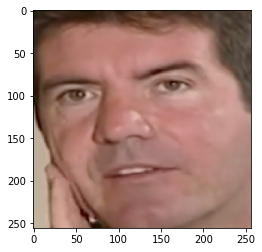

In [40]:

print(f"Predicted likelihood: {meso.predict(X)[0][0]:.4f}")
plt.imshow(np.squeeze(X));

In [27]:
import numpy as np
%run classifier.ipynb
%run pipeline.ipynb

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
classifier = Meso4()
classifier.load('weights/Meso4_DF1')

predictions = compute_accuracy(classifier, 'test_video')
for video_name in predictions:
    print('`{}` video class prediction :'.format(video_name), predictions[video_name][0])

Dealing with video  fake.mp4
Face extraction warning :  0 - no face
Face extraction warning :  11 - found face in full frame [(239, 1070, 517, 793)]
Face extraction report of not_found : 2
Face extraction report of no_face : 1
Predicting  fake.mp4
Dealing with video  real.mp4
Face extraction warning :  0 - no face
Face extraction warning :  11 - no face
Face extraction warning :  22 - found face in full frame [(239, 1070, 517, 793)]
Face extraction report of not_found : 3
Face extraction report of no_face : 2
Predicting  real.mp4
`fake` video class prediction : 0.4074074074074074
`real` video class prediction : 0.7307692307692307


In [48]:
from IPython.display import Video

Video("fake.mp4",width=1024, height=576)

In [7]:
from IPython.display import Video

Video("real.mp4",width=1024, height=576)

In [41]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
classifier = Meso4()
classifier.load('weights/Meso4_DF1')

predictions = compute_accuracy(classifier, 'test_video')
for video_name in predictions:
    print('`{}` video class prediction :'.format(video_name), predictions[video_name][0])

Dealing with video  617_566.mp4
Face extraction warning :  0 - found face in full frame [(120, 466, 231, 355)]
Face extraction report of not_found : 1
Face extraction report of no_face : 0
Predicting  617_566.mp4
`617_566` video class prediction : 0.034482758620689655


In [44]:
from IPython.display import Video

Video("617_566.mp4",width=1024, height=576)